In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [24]:
columns = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
df_train = pd.read_csv('/content/trainKNN.txt',header=None,names = columns,index_col='ID')
df_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7


In [25]:
df_train.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [26]:
df_train['Fe'].value_counts() # 135 of 196 values of Fe are 0

0.00    135
0.17      6
0.09      6
0.10      5
0.24      5
0.11      4
0.07      3
0.14      3
0.22      3
0.12      3
0.15      2
0.08      2
0.16      2
0.28      2
0.19      2
0.18      1
0.05      1
0.21      1
0.29      1
0.25      1
0.31      1
0.34      1
0.20      1
0.32      1
0.26      1
0.30      1
0.06      1
0.01      1
Name: Fe, dtype: int64

In [27]:
df_train['Ba'].value_counts() # 163 of 196 values of Ba are 0

0.00    163
0.64      2
0.09      2
1.59      2
0.11      2
0.14      1
0.81      1
0.54      1
2.88      1
1.38      1
1.55      1
0.67      1
1.71      1
0.56      1
0.63      1
0.53      1
0.66      1
0.61      1
3.15      1
1.57      1
0.40      1
0.69      1
0.76      1
1.68      1
1.63      1
1.19      1
2.20      1
0.06      1
0.27      1
1.06      1
Name: Ba, dtype: int64

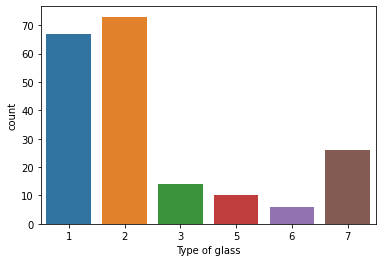

In [33]:
sns.countplot(x ='Type of glass', data = df_train) #the class distribution is visible

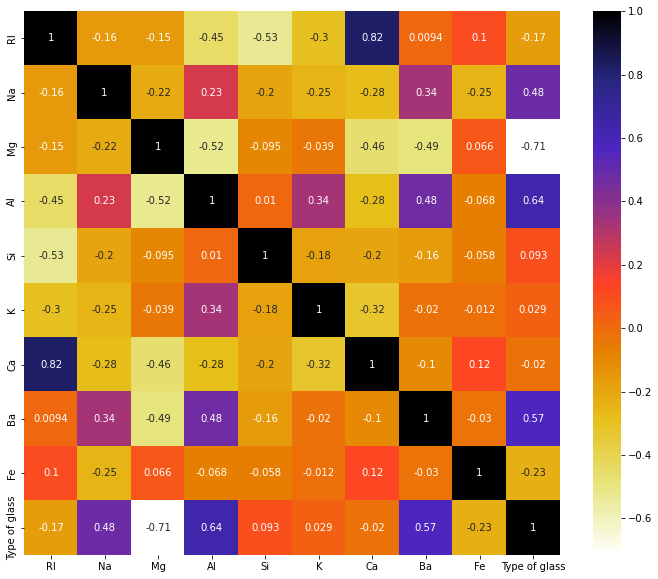

In [29]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

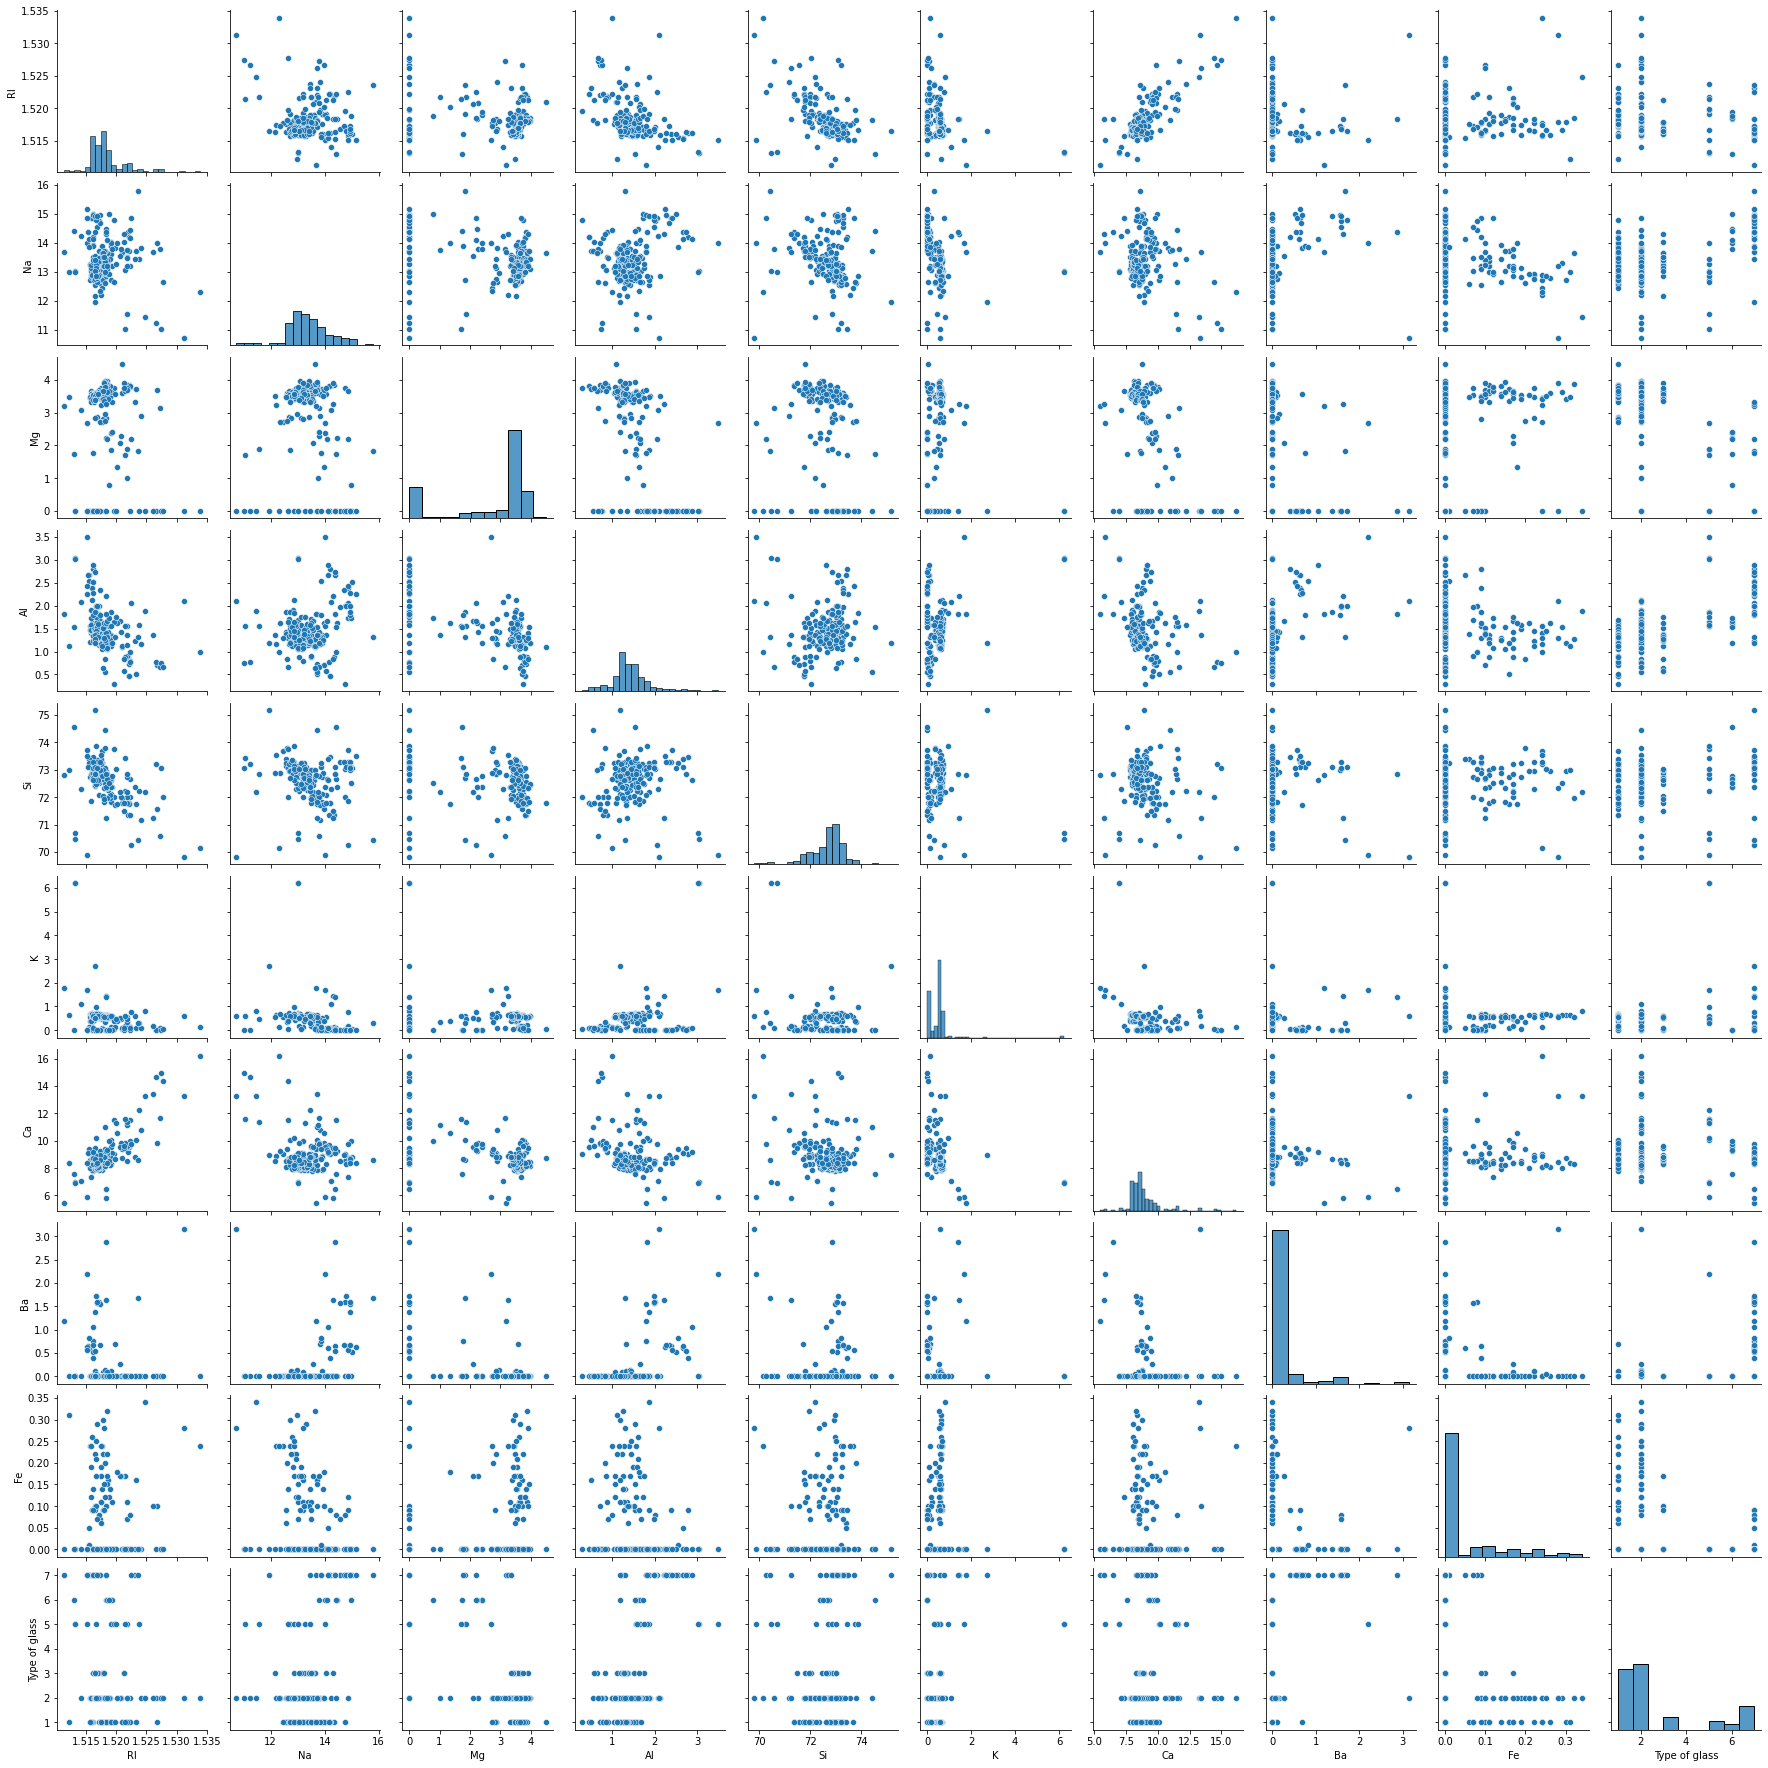

In [30]:
sns.pairplot(df_train) # the following pairplot shows the relation amongst variables

In [34]:
# I want to use mutual info classifier for selecting feature based on importances
from sklearn.feature_selection import mutual_info_classif
X_train = df_train.drop('Type of glass',axis=1)
y_train = df_train['Type of glass']
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.30054057, 0.24463118, 0.3864573 , 0.44134599, 0.08454509,
       0.27862819, 0.26890237, 0.27343506, 0.04003263])

In [36]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Al    0.441346
Mg    0.386457
RI    0.300541
K     0.278628
Ba    0.273435
Ca    0.268902
Na    0.244631
Si    0.084545
Fe    0.040033
dtype: float64

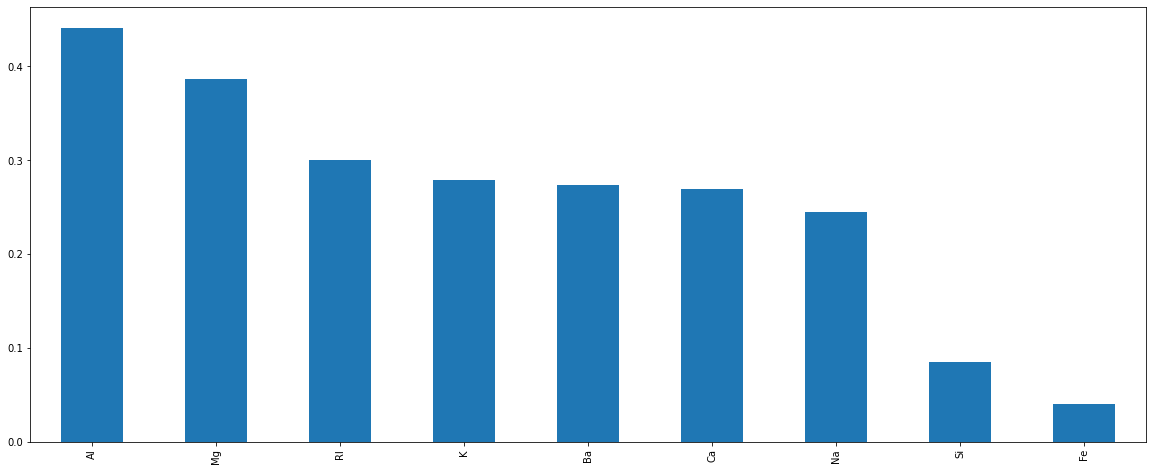

In [37]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
# alumininium is the most important feature

Training with two different KNN models 

In [40]:
knn_clf_euclid = KNeighborsClassifier(metric='euclidean')
knn_clf_man = KNeighborsClassifier(metric='manhattan')

In [41]:
knn_clf_euclid.fit(X_train,y_train)
knn_clf_man.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [42]:
#importing the test data 
columns = ['ID','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass']
df_test = pd.read_csv('/content/testKNN.txt',header=None,names = columns,index_col='ID')
df_test 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
ID,,,,,,,,,,
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3


In [43]:
X_test = df_test.drop('Type of glass',axis=1)
y_test = df_test['Type of glass']

Testing with KNN model 1: Euclidean distance



In [44]:
print(f'Accuracy of Model1 - Euclidean: {knn_clf_euclid.score(X_test,y_test)}')

Accuracy of Model1 - Euclidean: 0.5


In [46]:
from sklearn.metrics import classification_report
y_pred = knn_clf_euclid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.20      0.33      0.25         3
           3       1.00      0.33      0.50         3
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         3
           7       0.75      1.00      0.86         3

    accuracy                           0.50        18
   macro avg       0.56      0.50      0.45        18
weighted avg       0.56      0.50      0.45        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing with KNN model 2: Manhattan distance


In [47]:
print(f'Accuracy of Model2 - Manhattan: {knn_clf_man.score(X_test,y_test)}')

Accuracy of Model2 - Manhattan: 0.4444444444444444


In [49]:
y_pred1 = knn_clf_man.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.38      1.00      0.55         3
           2       0.20      0.33      0.25         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         3
           7       0.75      1.00      0.86         3

    accuracy                           0.44        18
   macro avg       0.39      0.44      0.36        18
weighted avg       0.39      0.44      0.36        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We notice that the euclidean based model is performing a little better